In [5]:
import pandas as pd 
import os 
os.getcwd()
os.chdir('C:/Users/acorn/Desktop')
df = pd.read_csv('./acorn_file/BankChurners.csv')

In [6]:
# module import 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import sklearn
import statsmodels.api as sm

In [7]:
# 인코딩 진행 
bank = df.copy()
bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)
bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
bank.drop(['CLIENTNUM'], axis=1, inplace=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OneHotEncoder(sparse_output=False)
bank_a = encoder.fit_transform(bank[['Gender','Marital_Status','Education_Level','Income_Category','Card_Category']])
encoder_b = LabelEncoder()
bank_b = encoder_b.fit_transform(bank['Attrition_Flag'])


In [8]:
bank_a = pd.DataFrame(bank_a, columns=encoder.get_feature_names_out())
bank_b = pd.DataFrame(bank_b)
bank_a

,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
bank_b

,0
0,1
1,1
2,1
3,1
4,1
...,...
10122,1
10123,0
10124,0
10125,0


In [10]:
# 기존 데이터, 인코딩 데이터 병합
bank = pd.concat([bank,bank_a,bank_b], axis = 1)

In [11]:
bank_a.columns

Index(['Gender_F', 'Gender_M', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'],
      dtype='object')

In [206]:
y = bank[0]
X = bank[['Gender_F', 'Gender_M', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver']]

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [156]:
# X = pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [157]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [158]:
importances = model.feature_importances_

In [159]:
selector = SelectFromModel(model, threshold='mean',prefit = True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

c:\Users\acorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\acorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [160]:
selected_features = X.columns[selector.get_support()]
print('Selected features using Random Forest:', selected_features)

Selected features using Random Forest: Index(['Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Income_Category_$40K - $60K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Silver'],
      dtype='object')


In [161]:
from sklearn.metrics import accuracy_score,roc_auc_score
model.fit(X_train_selected,y_train)
y_pred = model.predict(X_test_selected)
accurasy = accuracy_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
print("\nRF Accuracy with selected features:", accurasy)
print("\nRF roc_score with selected features:", roc_auc)



RF Accuracy with selected features: 0.8358012504113195

RF roc_score with selected features: 0.49941014549744395


In [207]:
# X = bank[['Marital_Status_Divorced', 'Marital_Status_Married',
#        'Marital_Status_Single', 'Marital_Status_Unknown',
#        'Education_Level_Doctorate', 'Education_Level_Graduate',
#        'Education_Level_High School', 'Education_Level_Post-Graduate',
#        'Education_Level_Uneducated', 'Education_Level_Unknown',
#        'Income_Category_$40K - $60K', 'Income_Category_Less than $40K',
#        'Card_Category_Blue', 'Card_Category_Silver']]
X = bank[['Marital_Status_Single', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Income_Category_$120K +']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [149]:
# y = bank[0]
# X = bank[['Gender_F', 'Gender_M', 'Marital_Status_Divorced',
#        'Marital_Status_Married', 'Marital_Status_Single',
#        'Marital_Status_Unknown', 'Education_Level_College',
#        'Education_Level_Doctorate', 'Education_Level_Graduate',
#        'Education_Level_High School', 'Education_Level_Post-Graduate',
#        'Education_Level_Uneducated', 'Education_Level_Unknown',
#        'Income_Category_$120K +', 'Income_Category_$40K - $60K',
#        'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
#        'Income_Category_Less than $40K', 'Income_Category_Unknown',
#        'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
#        'Card_Category_Silver']]

In [153]:
# from sklearn.feature_selection import SelectKBest, chi2, f_classif

# # 카이제곱 검정
# X_new_chi2 = SelectKBest(score_func=chi2, k=5).fit_transform(X, y)
# selected_indices = selector.get_support(indices=True)
# selected_features = X.columns[selected_indices]

# print("Selected Features:", selected_features)


Selected Features: Index(['Marital_Status_Single', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Income_Category_$120K +'],
      dtype='object')


In [132]:
# X_train, X_test, y_train, y_test = train_test_split(X_new_chi2, y, test_size=0.3, random_state=42)

# # 모델 학습
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # 예측 및 정확도 평가
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# roc = roc_auc_score(y_test, y_pred)
# print("Accuracy Score with selected features:", accuracy)
# print("roc Score with selected features:", roc)

Accuracy Score with selected features: 0.836788417242514
roc Score with selected features: 0.5


In [137]:
# X_chi = bank[['Marital_Status_Single', 'Education_Level_Post-Graduate',
#        'Education_Level_Uneducated', 'Education_Level_Unknown',
#        'Income_Category_$120K +']]

In [128]:
# # ANOVA F-검정
# X_new_anova = SelectKBest(score_func=f_classif, k=10).fit_transform(X, y)
# selected_indices = selector.get_support(indices=True)
# selected_features = X.columns[selected_indices]

# print("Selected Features:", selected_features)

Selected Features: Index(['Marital_Status_Single', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Income_Category_$120K +'],
      dtype='object')


In [129]:
# X_train, X_test, y_train, y_test = train_test_split(X_new_anova, y, test_size=0.3, random_state=42)

# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# roc = roc_auc_score(y_test, y_pred)
# print("Accuracy Score with selected features:", accuracy)
# print("roc Score with selected features:", roc)

Accuracy Score with selected features: 0.836788417242514
roc Score with selected features: 0.5


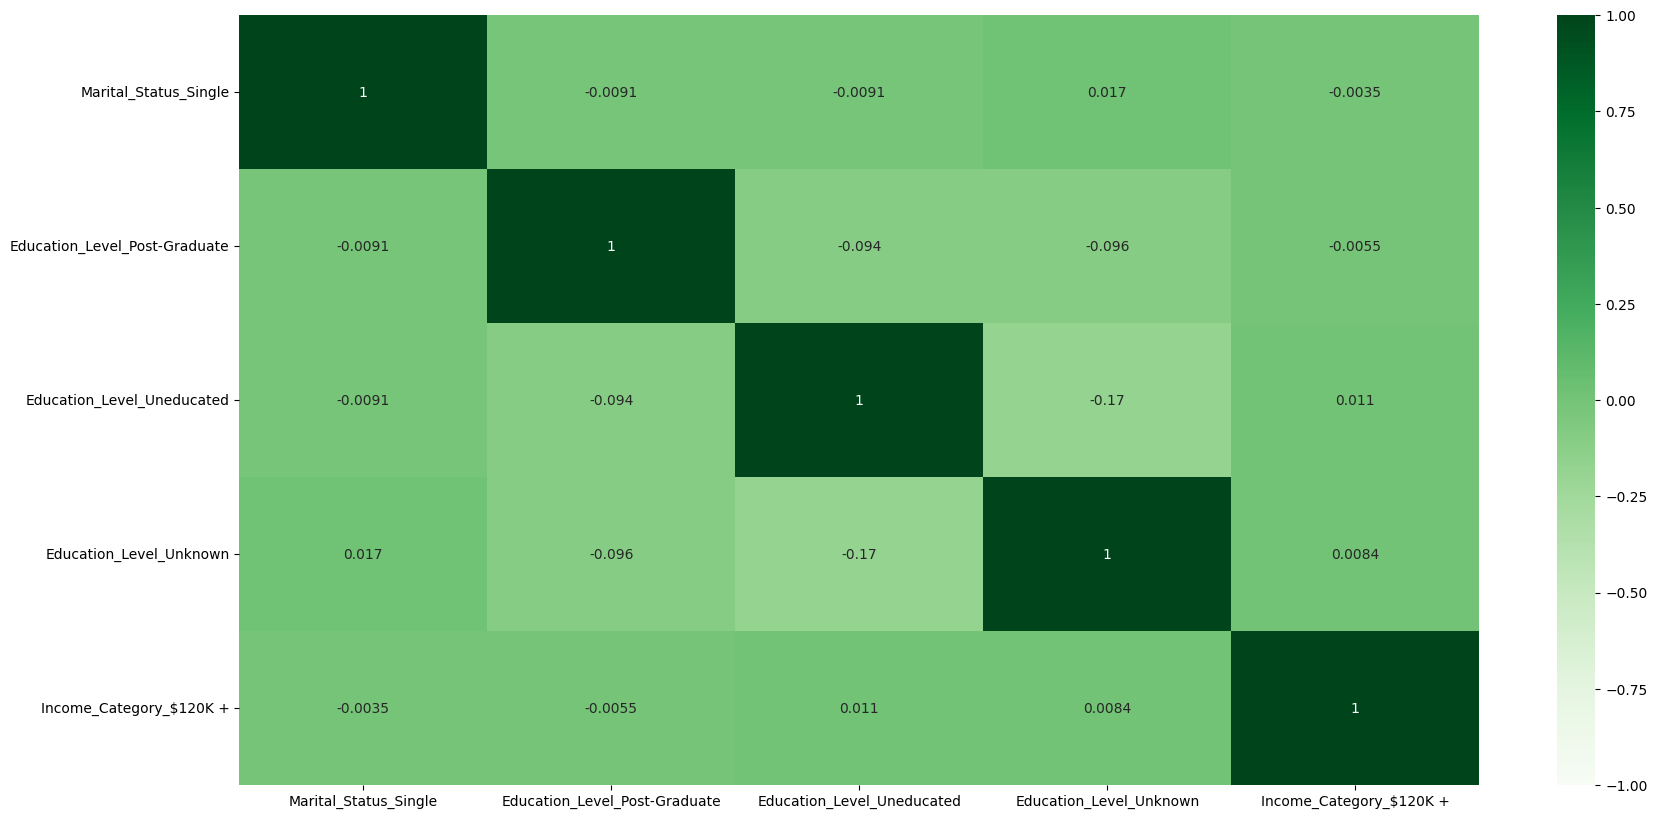

In [208]:
# 독립성 검정
corr_matrix = X_train.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix,cmap = 'Greens', annot= True, vmin = -1, vmax = 1)
plt.show()

In [209]:
y_pred = model.predict(X_train)

# 잔차 계산
residuals = y_train - y_pred

dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)

ValueError: shapes (7088,5) and (15,) not aligned: 5 (dim 1) != 15 (dim 0)

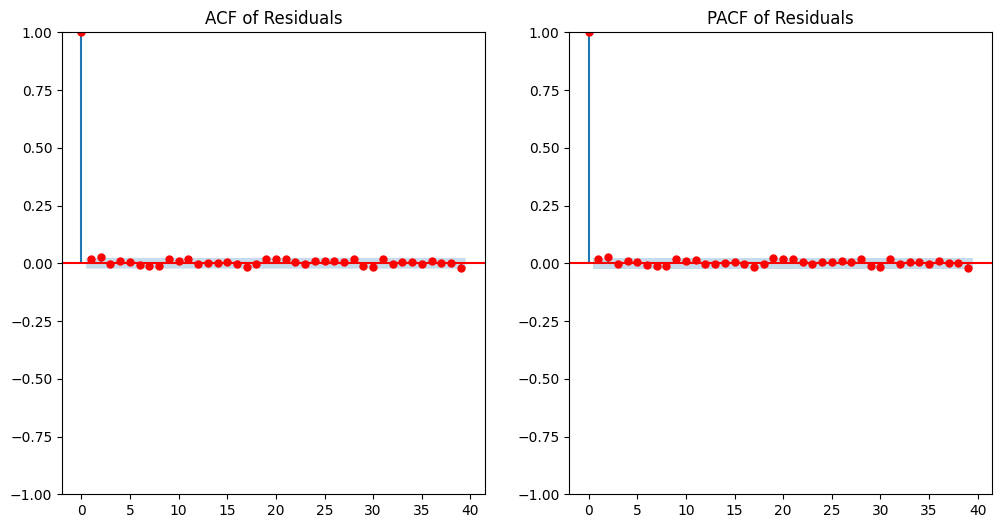

In [194]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# 자기상관 함수와 부분 자기상관 함수 시각화
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), color = 'red')
plt.title('ACF of Residuals')
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), color = 'r')
plt.title('PACF of Residuals')
plt.show()


In [210]:
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.438785
         Iterations 6


In [211]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(sm.add_constant(X_train))
y_pred_binary = (y_pred > .5).astype(int)
cm = confusion_matrix(y_train, y_pred_binary)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[   0 1131]
 [   0 5957]]


In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_train, y_pred_binary)
precision = precision_score(y_train, y_pred_binary)
recall = recall_score(y_train, y_pred_binary)
f1 = f1_score(y_train, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.84
Precision: 0.84
Recall: 1.00
F1 Score: 0.91


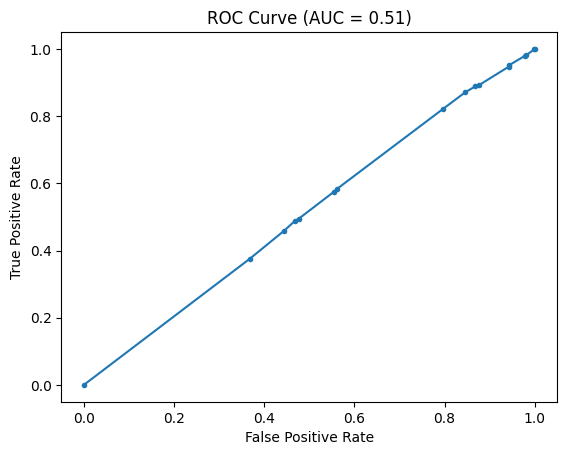

In [213]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_train, y_pred)
auc = roc_auc_score(y_train, y_pred)

plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()


In [214]:
print(model.summary())


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7082
Method:                           MLE   Df Model:                            5
Date:                Fri, 06 Sep 2024   Pseudo R-squ.:               0.0003726
Time:                        14:08:47   Log-Likelihood:                -3110.1
converged:                       True   LL-Null:                       -3111.3
Covariance Type:            nonrobust   LLR p-value:                    0.8036
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.7021      0.049     34.776      0.000       1.606       1.798
Marital_Status_Single            -0.0587      0.066     -0.886      0.376 